In [1]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
plt.style.use('seaborn')
import statsmodels.api as sm
import tensorflow as tf
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv("crop_pred.csv")

X = df[['pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn', 'B', 'Mo']]
y = df['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)


In [7]:
# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train

array([[-0.20884403, -0.80899236,  0.0480291 , ...,  1.29123908,
        -0.28684297, -0.2220442 ],
       [-0.32114968, -1.06385433,  1.21915889, ..., -0.70295573,
        -0.33198347, -0.21734374],
       [ 0.6147308 ,  0.81778621,  0.56039838, ..., -0.51321133,
        -0.25030066, -0.09983208],
       ...,
       [-0.10901678, -1.18857402,  0.56039838, ..., -0.57144971,
        -0.08478549, -0.12803488],
       [-0.22132243, -0.10947757, -1.03458508, ...,  1.30063237,
        -0.20730971, -0.21421009],
       [ 1.36343518,  2.58012966,  0.67955403, ..., -0.8626416 ,
         0.14736566, -0.05752788]])

In [9]:
from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [10]:
y_pred = classifer.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy_score(y_pred,y_test)

0.986046511627907

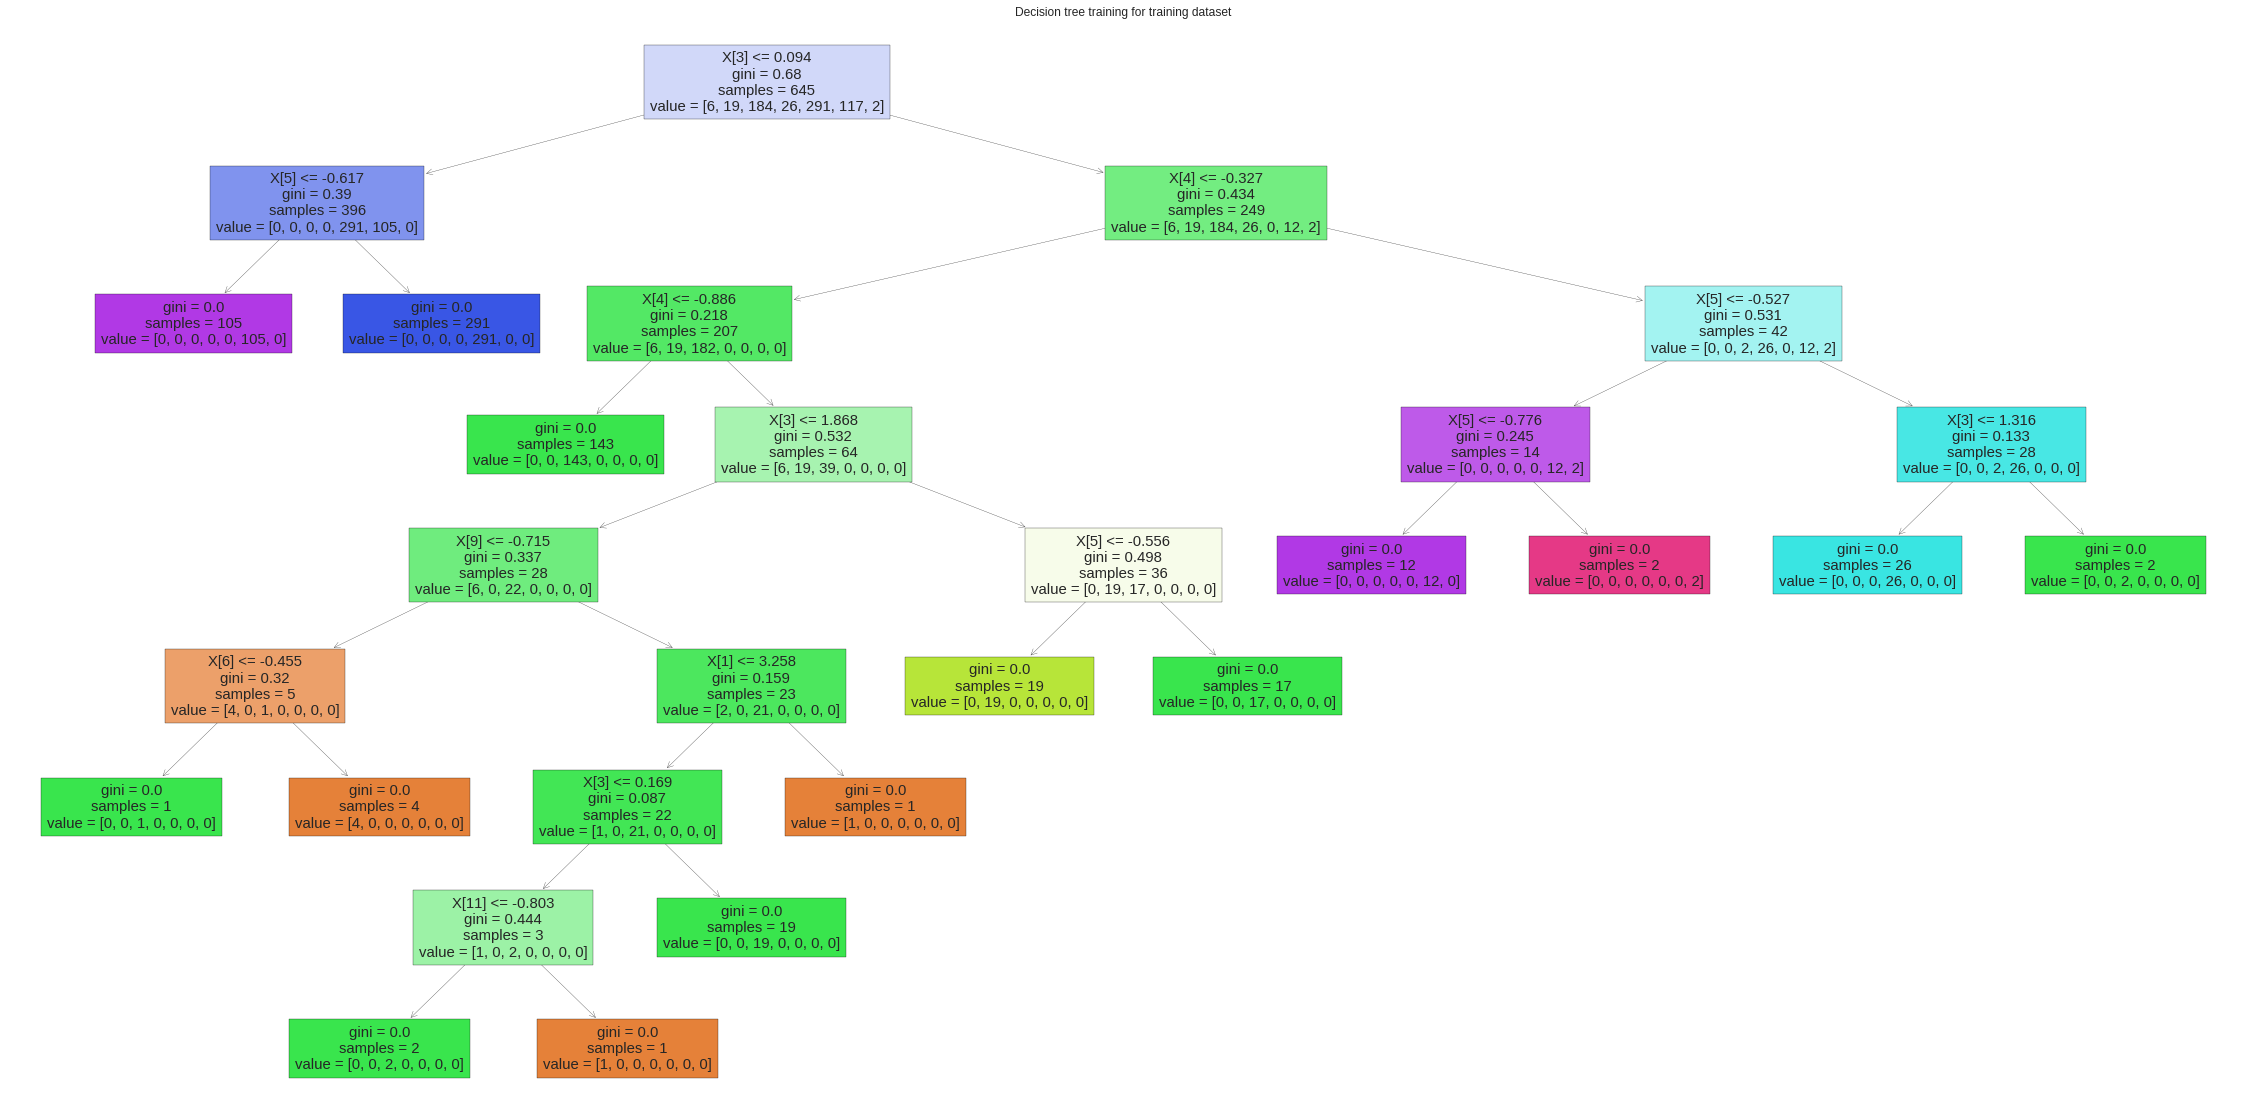

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

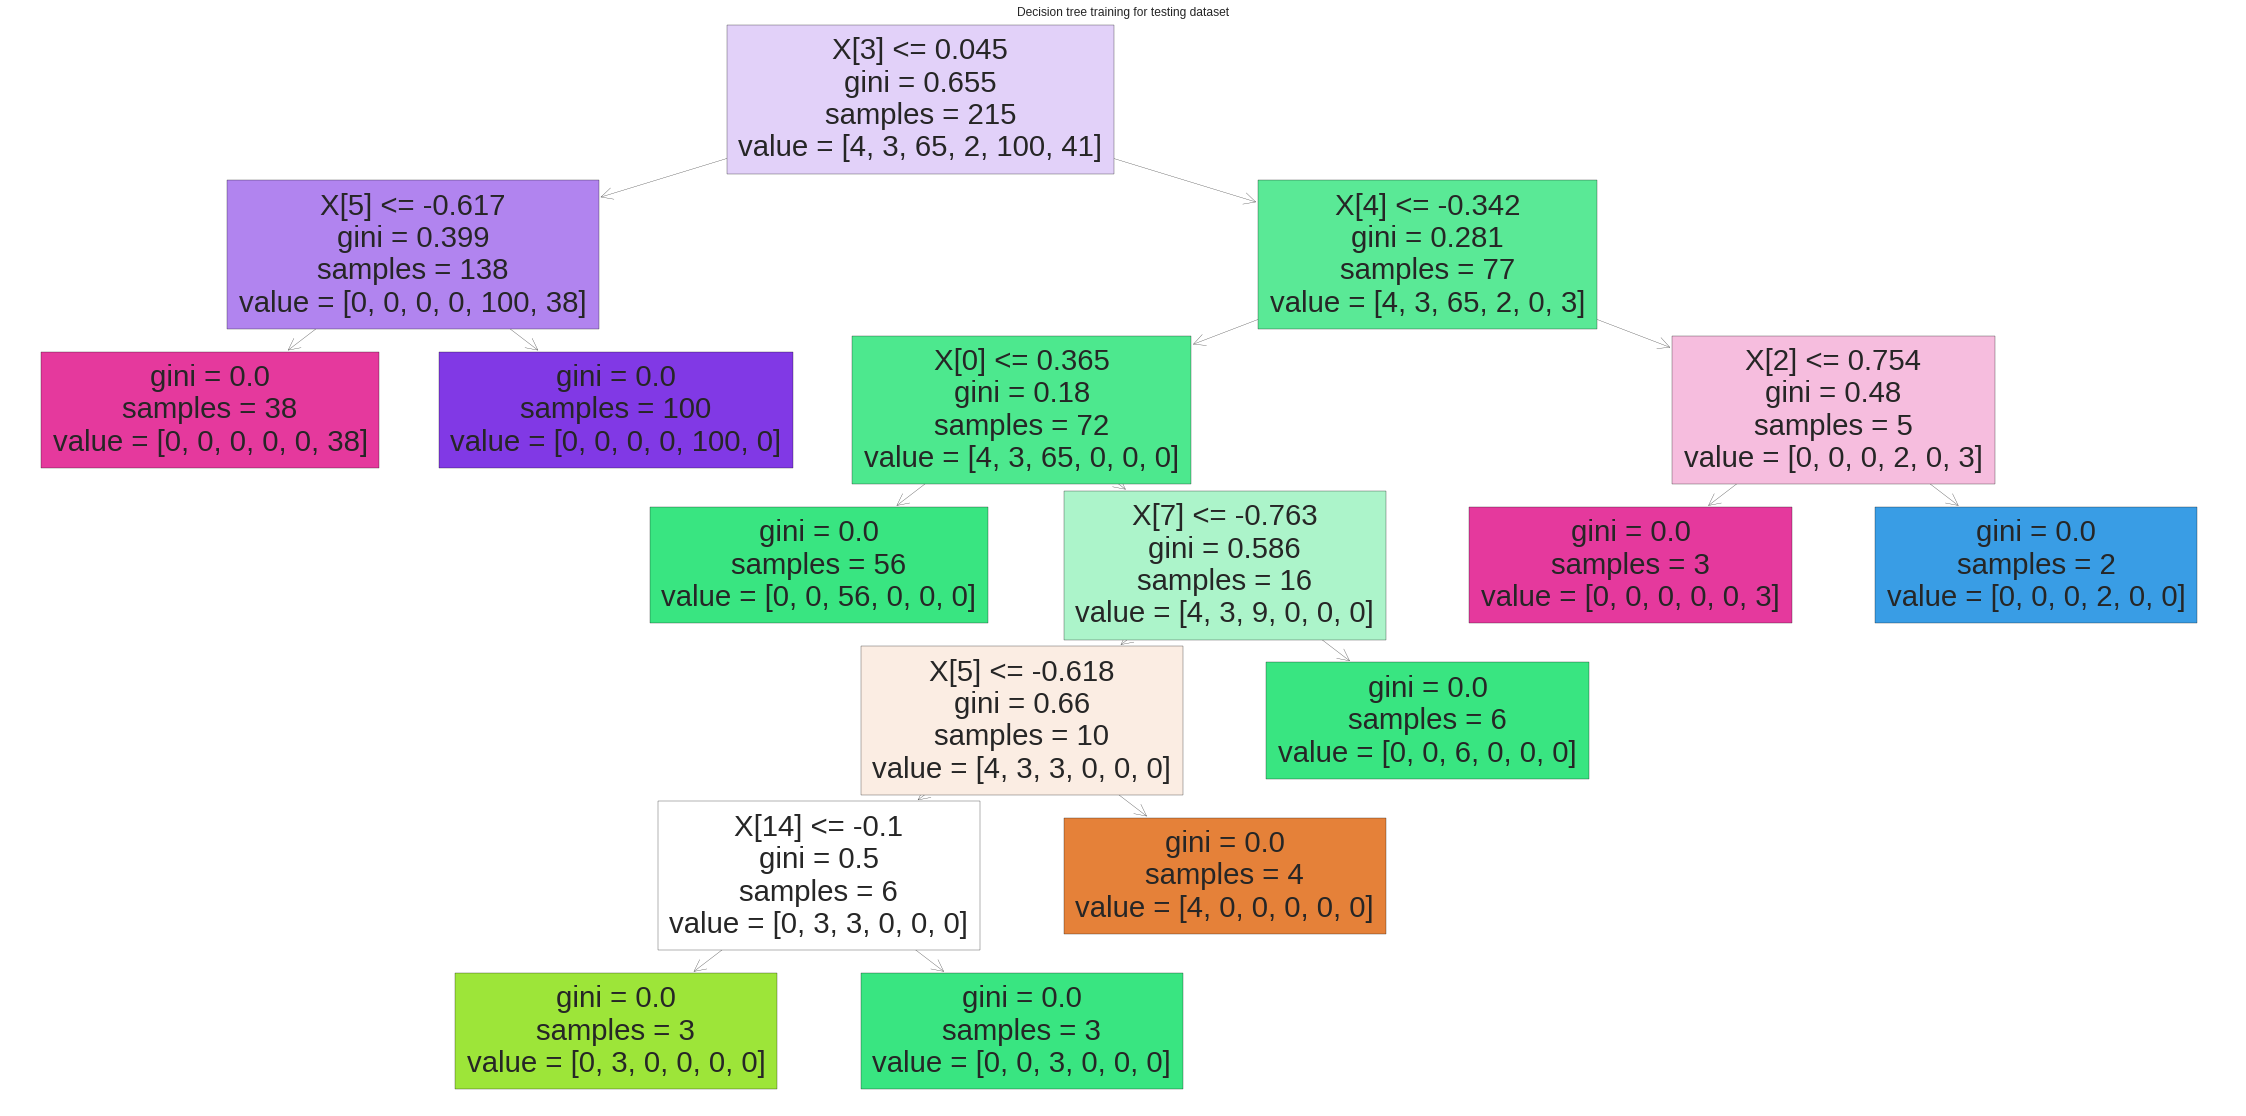

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

In [15]:
from sklearn import tree

# text based tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.05
|   |--- feature_5 <= -0.62
|   |   |--- class: 7
|   |--- feature_5 >  -0.62
|   |   |--- class: 6
|--- feature_3 >  0.05
|   |--- feature_4 <= -0.34
|   |   |--- feature_0 <= 0.37
|   |   |   |--- class: 3
|   |   |--- feature_0 >  0.37
|   |   |   |--- feature_7 <= -0.76
|   |   |   |   |--- feature_5 <= -0.62
|   |   |   |   |   |--- feature_14 <= -0.10
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_14 >  -0.10
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_5 >  -0.62
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  -0.76
|   |   |   |   |--- class: 3
|   |--- feature_4 >  -0.34
|   |   |--- feature_2 <= 0.75
|   |   |   |--- class: 7
|   |   |--- feature_2 >  0.75
|   |   |   |--- class: 5



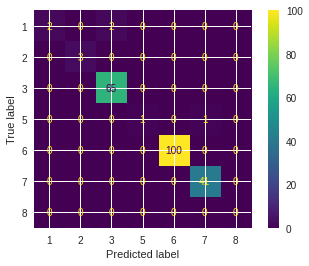

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_pred, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         4
           2       1.00      1.00      1.00         3
           3       0.97      1.00      0.98        65
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00       100
           7       0.98      1.00      0.99        41

    accuracy                           0.99       215
   macro avg       0.99      0.83      0.88       215
weighted avg       0.99      0.99      0.98       215

